In [1]:

from tensorflow.keras import datasets, utils, optimizers, losses, callbacks
from src.model import cnn_model
from src.utils import read_config, plot_results, plot_predicts
import datetime
from tensorflow.keras import layers, models
from tensorflow.keras.utils import image_dataset_from_directory

import os
import shutil, pathlib
import matplotlib.pyplot as plt

In [2]:
config = read_config()
# Set paths for train and test data
train_data_dir = './data/MNIST Dataset/Train'
test_data_dir = './data/MNIST Dataset/Test'

In [14]:
train_num_images = []
test_num_images = []
for i in range(10):
    num_train = len(os.listdir(os.path.join(train_data_dir, str(i))))
    train_num_images.append(num_train)
    print(f'Train: {num_train} for class {i}')
    num_test = len(os.listdir(os.path.join(test_data_dir, str(i))))
    test_num_images.append(num_test)
    print(f'Test: {num_test} for class {i}\n')
    
print(f'Min Train: {min(train_num_images)} | Max Train: {max(train_num_images)}')
print(f'Min Test: {min(test_num_images)} | Max Test: {max(test_num_images)}')

train_min_num_image = min(train_num_images)
test_min_num_image = min(test_num_images)

Train: 5923 for class 0
Test: 980 for class 0

Train: 6742 for class 1
Test: 1135 for class 1

Train: 5958 for class 2
Test: 1032 for class 2

Train: 6131 for class 3
Test: 1010 for class 3

Train: 5842 for class 4
Test: 982 for class 4

Train: 5421 for class 5
Test: 892 for class 5

Train: 5918 for class 6
Test: 958 for class 6

Train: 6265 for class 7
Test: 1028 for class 7

Train: 5851 for class 8
Test: 974 for class 8

Train: 5949 for class 9
Test: 1009 for class 9

Min Train: 5421 | Max Train: 6742
Min Test: 892 | Max Test: 1135


In [27]:
new_base_dir = pathlib.Path("./data/MNIST_Manual_Dataset")

def make_subset(base_dir, subset_name, create_balance, start_index, end_index):
    for category in ("0", "1", "2", "3", "4", "5", "6", "7", "8", "9"):
        dir = new_base_dir / subset_name / category
        if not os.path.exists(dir):
            os.makedirs(dir)
        if create_balance:
            files = os.listdir(os.path.join(base_dir, category))
            fnames = [files[i] for i in range(start_index, end_index)]
            for fname in fnames:
                shutil.copyfile(src=os.path.join(base_dir, category, fname),
                dst=os.path.join(dir, fname))
        else:
            pass # for creating imbalance dataset (using percentages)

In [25]:
print(train_min_num_image-1)
5000 - (5000 * 0.8)


5420


1000.0

In [30]:
make_subset(train_data_dir, "validation", create_balance=True, start_index=0, end_index=1000)
make_subset(train_data_dir, "train", create_balance=True, start_index=1000, end_index=5000)
make_subset(test_data_dir, "test", create_balance=True, start_index=0, end_index=800)

In [3]:
train_dir = "./data/MNIST_Manual_Dataset/train"
validation_dir = "./data/MNIST_Manual_Dataset/validation"
test_dir = "./data/MNIST_Manual_Dataset/test"

In [4]:
# Doc: https://keras.io/api/data_loading/image/

print('Train Loader:')
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(100, 100),
    batch_size=32,
    label_mode='int',
    color_mode='grayscale'
)

print('Validation Loader:')
validation_dataset = image_dataset_from_directory(
    validation_dir,
    image_size=(100, 100),
    batch_size=32,
    label_mode='int',
    color_mode='grayscale'
)

print('Test Loader:')
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(100, 100),
    batch_size=32,
    label_mode='int',
    color_mode='grayscale'
)

Train Loader:
Found 40010 files belonging to 10 classes.
Validation Loader:
Found 9990 files belonging to 10 classes.
Test Loader:
Found 7990 files belonging to 10 classes.


In [40]:
type(test_dataset)
# test_dataset.element_spec

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [55]:
for data_batch, label_batch in train_dataset.take(1):
    print('data batch shape:', data_batch.shape)
    print('label batch shape:', label_batch.shape)

plt.show()

data batch shape: (32, 100, 100, 1)
label batch shape: (32,)


C:\Users\moham\AppData\Local\Temp\ipykernel_10436\3344828838.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [4]:
type(validation_dataset)
# len(train_dataset)
# train_dataset.shape

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [65]:

inputs = layers.Input(shape=(100, 100, 1))
try:
    x = layers.Rescaling(1./255)(inputs)
except:
    x = layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = models.Model(inputs=inputs, outputs=outputs)

model.summary()
# model = cnn_model()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
rescaling_3 (Rescaling)      (None, 100, 100, 1)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 98, 98, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 21, 21, 128)       7385

### Model Compile and Callbacks

In [66]:

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [60]:
checkpoints = callbacks.ModelCheckpoint(config["training_data"]["callbacks_path_checkpoints"] + 'weights_epoch_{epoch}.h5',
                                        monitor='val_loss',
                                        save_weights_only=True)
tensorboard = callbacks.TensorBoard(config["training_data"]["callbacks_path_tensorboard"] + 'tensorboard')
csv_logger = callbacks.CSVLogger(config["training_data"]["callbacks_path_csvlogger"] + 'training.log')
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=2)
callbacks_list = [checkpoints, tensorboard, csv_logger, early_stopping]

### Model Train

In [67]:
time_start = datetime.datetime.now()
epochs = 30
model_history = model.fit(train_dataset, epochs=epochs, validation_data=validation_dataset, callbacks=callbacks_list)
time_end = datetime.datetime.now()
print(f"Training Time: {time_end-time_start}")

Epoch 1/30
1251/1251 [==============================] - 110s 87ms/step - loss: 0.1648 - accuracy: 0.9483 - val_loss: 0.0819 - val_accuracy: 0.9749
Epoch 2/30
1251/1251 [==============================] - 108s 86ms/step - loss: 0.0620 - accuracy: 0.9808 - val_loss: 0.0619 - val_accuracy: 0.9817
Epoch 3/30
1251/1251 [==============================] - 106s 85ms/step - loss: 0.0427 - accuracy: 0.9860 - val_loss: 0.0596 - val_accuracy: 0.9843
Epoch 4/30
1251/1251 [==============================] - 107s 85ms/step - loss: 0.0309 - accuracy: 0.9901 - val_loss: 0.0677 - val_accuracy: 0.9819
Epoch 5/30
1251/1251 [==============================] - 107s 85ms/step - loss: 0.0244 - accuracy: 0.9922 - val_loss: 0.0665 - val_accuracy: 0.9807
Epoch 6/30
1251/1251 [==============================] - 106s 85ms/step - loss: 0.0203 - accuracy: 0.9936 - val_loss: 0.0659 - val_accuracy: 0.9843
Training Time: 0:10:44.814486


In [68]:
model.save(config["training_data"]["model_save_path"] + 'model_custom.h5')
model.save_weights(config["training_data"]["model_save_path"] + 'model_custom_weights.h5')

In [72]:
plot_results(model_history)

## Model Evaluation

In [73]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset)
print("Test Accuracy: ", test_accuracy); print("Test Loss: ", test_loss)

250/250 [==============================] - 23s 90ms/step - loss: 0.0700 - accuracy: 0.9826
Test Accuracy:  0.9826032519340515
Test Loss:  0.07002811878919601


## Model Load

In [5]:
from tensorflow.keras.models import load_model
model = load_model(config["training_data"]["model_save_path"] + 'model_custom.h5')

In [20]:
import numpy as np
# Assuming `dataset` is your tf.data.Dataset object
unbatched_dataset = test_dataset.unbatch()
images, labels = [], []
for image, label in unbatched_dataset.as_numpy_iterator():
    images.append(image)
    labels.append(label)

test_images = np.array(images)
test_labels = np.array(labels)

In [33]:
test_labels_pred = model.predict(test_dataset)
test_labels_np = np.argmax(test_labels_pred, axis=1)

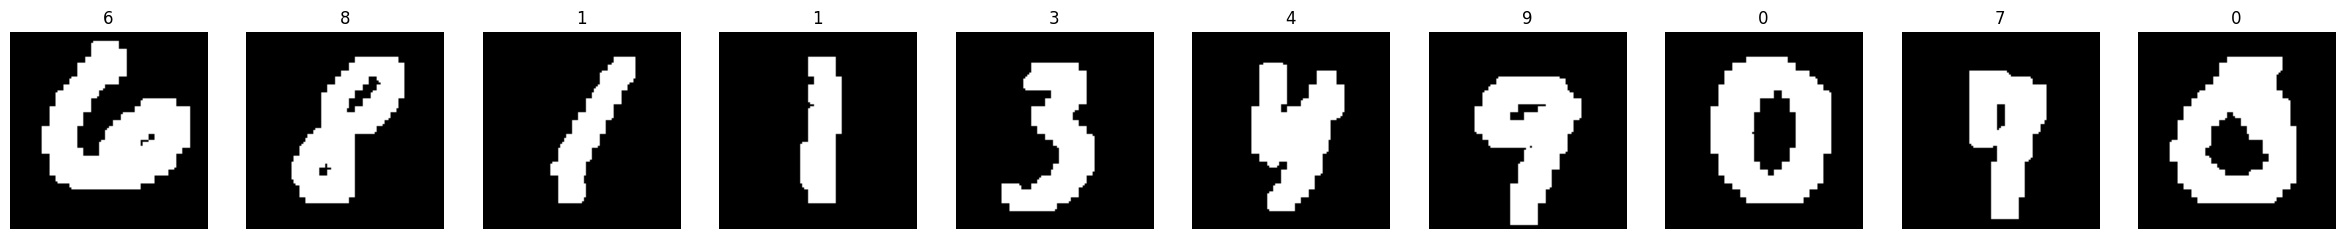

In [21]:

plot_predicts(model, test_dataset, test_labels, test_images, 10)